In [7]:
#cargar drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics
!pip install opencv-python
!pip install Pillow
!pip install matplotlib
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
# ================================
# CELDA 2: Importar librerías
# ================================

import os
import cv2
import numpy as np
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
import io
from datetime import datetime
import shutil


In [9]:
# ================================
# CELDA 3: Configurar Google Drive (si tu dataset está en Drive)
# ================================

from google.colab import drive
drive.mount('/content/drive')

# Cambiar esta ruta a donde tienes tu dataset
DATASET_PATH = '/content/drive/MyDrive/modeloTrampa/trampa'  # Ajusta esta ruta


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# ================================
# CELDA 4: Verificar estructura del dataset
# ================================

def verificar_estructura_dataset(dataset_path):
    """Verifica la estructura del dataset YOLOv8"""
    print("Estructura del dataset:")
    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(dataset_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Mostrar solo los primeros 5 archivos
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... y {len(files) - 5} archivos más")

# Verificar estructura
verificar_estructura_dataset(DATASET_PATH)

Estructura del dataset:
trampa/
  data.yaml
  README.roboflow.txt
  README.dataset.txt
  valid/
    labels.cache
    images/
      VID-20250628-WA0090_mp4-0017_jpg.rf.2e1808e5f446ba20e3a734190922e36f.jpg
      VID-20250628-WA0087_mp4-0003_jpg.rf.9aabe3a11e2bd3935527a375e69ee190.jpg
      VID-20250628-WA0090_mp4-0011_jpg.rf.d2241fd23dfe12e12c22a1bd2b73562f.jpg
      VID-20250628-WA0090_mp4-0001_jpg.rf.97f851e8155137ec6c0c9e208202164a.jpg
      VID-20250628-WA0087_mp4-0007_jpg.rf.dee82496b000bb072dc861d3234ac13b.jpg
      ... y 12 archivos más
    labels/
      VID-20250628-WA0090_mp4-0016_jpg.rf.8412f9ec6e3ef4db6826a942385450eb.txt
      VID-20250628-WA0090_mp4-0012_jpg.rf.bc475f4273f11f40444dc3b9f2873593.txt
      VID-20250628-WA0090_mp4-0014_jpg.rf.df4b1002839e0233e86669f3605c4d62.txt
      VID-20250628-WA0087_mp4-0000_jpg.rf.8e1f2d46c575927ac90fbf9973571483.txt
      VID-20250628-WA0087_mp4-0013_jpg.rf.d9aeaafce231a0a328c9c3612b0bb200.txt
      ... y 12 archivos más
  train/
    labe

In [11]:
# ================================
# CELDA 5: Crear archivo data.yaml
# ================================

# Crear archivo de configuración para YOLOv8
data_yaml_content = f"""
train: {DATASET_PATH}/train/images
val: {DATASET_PATH}/valid/images

nc: 1  # número de clases
names: ['trampa']  # nombres de las clases
"""

with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml_content)

print("Archivo data.yaml creado:")
print(data_yaml_content)

Archivo data.yaml creado:

train: /content/drive/MyDrive/modeloTrampa/trampa/train/images
val: /content/drive/MyDrive/modeloTrampa/trampa/valid/images

nc: 1  # número de clases
names: ['trampa']  # nombres de las clases



In [7]:
# ================================
# CELDA 7: Evaluar el modelo
# ================================

# Cargar el mejor modelo entrenado
model = YOLO('/content/runs/detect/trampa_detector/weights/best.pt')

# Evaluar en el conjunto de validación
metrics = model.val()

print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 50.1±16.4 MB/s, size: 87.6 KB)


val: Scanning /content/drive/MyDrive/modeloTrampa/trampa/valid/labels.cache... 17 images, 3 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]


                   all         17         19    0.00294      0.789     0.0056    0.00176
Speed: 0.2ms preprocess, 14.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val6
mAP50: 0.00560421269244594
mAP50-95: 0.001756078298320076


In [8]:
# ================================
# CELDA 6: Entrenar el modelo YOLOv8
# ================================

# Cargar modelo preentrenado
#model = YOLO('yolov8n.pt')  # Puedes usar yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt

# Entrenar el modelo
results = model.train(
    data='/content/data.yaml',
    epochs=600,  # Ajusta según tus necesidades
    imgsz=640,
    batch=32,
    name='trampa_detector',
    patience=50,
    save=True,
    plots=True
)

print("Entrenamiento completado!")

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=600, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/trampa_detector/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=trampa_detector5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspec

train: Scanning /content/drive/MyDrive/modeloTrampa/trampa/train/labels.cache... 77 images, 24 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 47.0±15.4 MB/s, size: 88.1 KB)


val: Scanning /content/drive/MyDrive/modeloTrampa/trampa/valid/labels.cache... 17 images, 3 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]


Plotting labels to runs/detect/trampa_detector5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/trampa_detector5
Starting training for 600 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/600      5.18G      1.424      1.772      1.041         24        640: 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         17         19    0.00314      0.842    0.00659    0.00294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/600       5.2G      1.496      1.754      1.081         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]

                   all         17         19    0.00314      0.842     0.0303     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/600      5.22G      1.553      1.966      1.071         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         17         19    0.00314      0.842     0.0354     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/600      5.22G      1.515      1.935       1.09         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         17         19    0.00314      0.842      0.193        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/600      5.23G      1.474       1.67      1.042         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         17         19       0.36      0.632      0.452       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/600      5.23G      1.471      1.572      1.062         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         17         19      0.775      0.632      0.599      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/600      5.23G      1.511      1.695      1.065         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         17         19    0.00636      0.789      0.598      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/600      5.23G      1.439      1.609      1.004         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


                   all         17         19    0.00294      0.789      0.613      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/600      5.23G      1.413      1.497      1.031         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         17         19    0.00275      0.737      0.532      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/600      5.23G      1.463      1.593      1.025         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         17         19    0.00275      0.737      0.428      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/600      5.24G      1.443       1.65      1.029         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         17         19    0.00255      0.684      0.387      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/600      5.24G      1.487      1.479      1.092         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         17         19    0.00363      0.737     0.0724     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/600      5.24G      1.563      1.567      1.075         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         17         19    0.00255      0.684     0.0563      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/600      5.25G      1.469      1.515      1.049         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         17         19      0.107     0.0526      0.165     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/600      5.25G       1.51      1.444      1.032         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         17         19     0.0239     0.0526     0.0529     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/600      5.27G      1.556      1.522      1.049         22        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         17         19          1      0.101      0.527      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/600      5.27G      1.525      1.453      1.057         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         17         19      0.524      0.158      0.316      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/600      5.29G      1.415      1.378      1.043         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         17         19      0.221      0.343      0.172     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/600      5.29G      1.346      1.622      1.039         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         17         19      0.665      0.368       0.54      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/600      5.29G      1.378      1.344     0.9948         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         17         19          1      0.289      0.733      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/600       5.3G      1.366      1.293     0.9817         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         17         19          1      0.315      0.686      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/600      5.31G      1.347      1.265      0.994         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         17         19      0.717      0.137      0.536      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/600      5.31G      1.493      1.281      1.056         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         17         19    0.00295      0.789       0.26      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/600      5.31G      1.294      1.157      0.973         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         17         19    0.00326      0.789     0.0889     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/600      5.31G       1.39      1.375      0.991         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         17         19      0.525      0.263      0.414      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/600      5.31G      1.413      1.339      1.038         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


                   all         17         19      0.884      0.401      0.613      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/600      5.31G      1.423      1.296      1.061         16        640: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all         17         19      0.888      0.526      0.542      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/600      5.31G      1.374      1.176      1.029         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         17         19      0.782      0.526      0.614      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/600      5.31G      1.319      1.195     0.9881         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         17         19      0.895      0.632      0.707      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/600      5.31G        1.6      1.347      1.107         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         17         19      0.845      0.574      0.594      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/600      5.31G      1.364      1.169      1.021         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         17         19      0.724      0.579      0.559      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/600      5.31G      1.408      1.201      1.035         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         17         19      0.793      0.526      0.574      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/600      5.31G      1.363      1.168     0.9904         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         17         19      0.761      0.672      0.651      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/600      5.31G      1.415       1.16       1.01         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         17         19      0.951      0.632      0.679      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/600      5.31G      1.445      1.145      1.053         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         17         19      0.966      0.632      0.679       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/600      5.31G      1.364      1.116      1.014         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         17         19      0.944      0.632      0.689      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/600      5.32G      1.407      1.025      1.012         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         17         19          1      0.612      0.682      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/600      5.33G      1.487      1.107      1.051         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         17         19      0.912      0.632      0.661      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/600      5.33G      1.363      1.009      1.005         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         17         19      0.918      0.589      0.673      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/600      5.35G      1.378     0.9855      1.031         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         17         19      0.967      0.526      0.584      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/600      5.35G      1.344     0.9906      1.006         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         17         19      0.971      0.632      0.729      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/600      5.35G      1.335      1.007     0.9881         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         17         19          1      0.628      0.733      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/600      5.35G      1.301     0.9468     0.9602         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         17         19      0.875      0.632      0.725      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/600      5.35G      1.405      1.228       1.02          9        640: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         17         19      0.862      0.684      0.711      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/600      5.35G      1.324     0.9855     0.9961         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         17         19      0.854      0.684      0.684       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/600      5.35G      1.335      0.915     0.9926         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         17         19      0.824      0.632      0.669      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/600      5.35G      1.383      1.071     0.9954         14        640: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         17         19          1       0.57       0.67      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/600      5.35G      1.337     0.9351      1.017         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         17         19       0.91      0.632      0.711      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/600      5.35G      1.272      1.008     0.9807         11        640: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         17         19      0.904      0.632      0.721      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/600      5.35G      1.315     0.9306     0.9631         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         17         19      0.992      0.684      0.745      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/600      5.35G      1.288     0.8708     0.9971         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         17         19          1      0.719      0.793      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/600      5.35G      1.326     0.8421      1.004         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         17         19      0.857      0.684      0.696       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/600      5.35G      1.351     0.9319      1.018         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         17         19      0.859      0.684      0.725      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/600      5.35G       1.29     0.8473     0.9669         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         17         19      0.928      0.682      0.698      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/600      5.35G      1.227     0.9036      0.947         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         17         19          1      0.681      0.743      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/600      5.35G      1.297     0.8499     0.9675         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         17         19      0.911      0.684      0.745      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/600      5.35G      1.224      0.796      0.964         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19       0.92      0.684      0.759      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/600      5.35G      1.235     0.7876      0.969         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         17         19      0.865      0.737      0.781      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/600      5.35G      1.324     0.8317      1.006         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         17         19      0.927      0.737      0.782      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/600      5.35G      1.182     0.8155     0.9712         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         17         19      0.926      0.737      0.711      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/600      5.35G      1.236     0.7965     0.9434         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         17         19      0.916      0.737      0.713      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/600      5.35G      1.294     0.8231      1.004         16        640: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         17         19      0.918      0.737      0.731       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/600      5.35G      1.318     0.8174     0.9684         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         17         19      0.856      0.737      0.731      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/600      5.35G      1.376      0.877      1.057         12        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         17         19      0.868      0.737      0.699      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/600      5.35G      1.451     0.8876      1.007         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         17         19       0.87      0.737        0.7      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/600      5.35G      1.264      0.777      1.004         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         17         19      0.916      0.737      0.716      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/600      5.35G      1.266     0.7751      1.007         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         17         19      0.919      0.737      0.737      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/600      5.35G      1.321     0.9216      1.001         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         17         19      0.871      0.737      0.791       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/600      5.35G      1.201     0.7324     0.9557         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         17         19      0.805      0.684      0.693      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/600      5.35G       1.21     0.8566     0.9657         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         17         19       0.87      0.737      0.772      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/600      5.35G      1.162     0.7356     0.9402         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         17         19       0.87      0.706      0.772      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/600      5.35G       1.21     0.7765     0.9477         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         17         19      0.919      0.684      0.759       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/600      5.35G      1.151     0.7173     0.9445         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         17         19      0.822       0.73      0.747      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/600      5.35G      1.125     0.7089     0.9762         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         17         19      0.699      0.734      0.641      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/600      5.35G      1.168      0.734     0.9593         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         17         19      0.602      0.737      0.607      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/600      5.35G      1.229     0.7434     0.9442         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.721      0.632      0.636      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/600      5.35G      1.187     0.7495     0.9651         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all         17         19      0.727      0.737      0.725      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/600      5.35G      1.244     0.7676     0.9726         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         17         19      0.853      0.632      0.674      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/600      5.35G       1.19     0.7474     0.9696         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         17         19       0.85      0.632      0.683      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/600      5.35G      1.171     0.7153     0.9584         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         17         19      0.927      0.684      0.765      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/600      5.35G      1.095     0.6878     0.9207         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         17         19      0.926      0.684      0.778       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/600      5.35G      1.171     0.7044     0.9647         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         17         19      0.886      0.684      0.786      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/600      5.35G      1.121     0.6752     0.9496         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         17         19      0.869      0.737      0.789      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/600      5.35G      1.162     0.6774     0.9409         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         17         19      0.874      0.731      0.781      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/600      5.35G      1.105     0.6448       0.93         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         17         19      0.822      0.684      0.771      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/600      5.35G      1.197     0.7184     0.9593         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         17         19      0.811      0.632      0.662      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/600      5.35G      1.154     0.7017     0.9225         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         17         19      0.819      0.684       0.67       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/600      5.35G      1.134     0.7088     0.9531         18        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         17         19      0.818      0.737      0.784      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/600      5.35G      1.172     0.7314     0.9454         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         17         19      0.933      0.732      0.818      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/600      5.35G      1.223     0.7472     0.9208         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         17         19      0.934      0.737      0.836      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/600      5.35G      1.081     0.6967     0.9294         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         17         19          1      0.725      0.834      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/600      5.35G      1.191     0.6983     0.9356         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         17         19      0.855      0.737      0.811      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/600      5.35G      1.183     0.7444     0.9743         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         17         19      0.864      0.737      0.806      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/600      5.35G      1.105      0.706     0.9523         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         17         19      0.851      0.684      0.705      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/600      5.35G      1.174     0.7684     0.9644         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         17         19      0.888      0.684      0.712      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/600      5.35G      1.154     0.6873     0.9189         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         17         19      0.922      0.737      0.809      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/600      5.35G      1.082     0.6551     0.9229         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         17         19      0.925      0.737      0.816      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/600      5.35G      1.033      0.658     0.9127         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         17         19      0.968      0.737       0.82        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/600      5.35G      1.156     0.7004     0.9858         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         17         19       0.94      0.737      0.803      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/600      5.35G      1.111     0.6596      0.963         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         17         19       0.97      0.737      0.773      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/600      5.35G       1.09     0.6396     0.9122         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         17         19      0.986      0.737      0.762      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/600      5.35G      1.097     0.6165     0.9537         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         17         19      0.969      0.684      0.743      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/600      5.35G      1.076     0.6464     0.9192         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         17         19      0.979      0.684      0.726      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/600      5.35G      1.119     0.7319      0.933         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         17         19      0.838      0.632      0.667      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/600      5.35G      1.142     0.6465     0.9578         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         17         19      0.751      0.632      0.671      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/600      5.35G      1.253     0.6733     0.9521         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         17         19      0.922      0.619      0.719      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/600      5.35G      1.127     0.6885     0.9128         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         17         19      0.923      0.631      0.724      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/600      5.37G      1.119     0.6653     0.9503         11        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         17         19      0.904      0.632      0.749      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/600      5.37G      1.106     0.6535     0.9479         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         17         19      0.987      0.684      0.828      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/600      5.37G       1.07     0.6096     0.9342         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all         17         19      0.986      0.684       0.82        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/600      5.37G      1.128     0.6282     0.9231         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         17         19       0.98      0.684      0.815      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/600      5.37G      1.044       0.61     0.9103         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         17         19      0.993      0.737      0.822      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/600      5.37G      1.126     0.6438     0.9446         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         17         19          1      0.733       0.82      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/600      5.37G      1.224     0.6458     0.9295         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all         17         19      0.986      0.737      0.815      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/600      5.37G      1.063     0.6019      0.912         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         17         19      0.988      0.737      0.822      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/600      5.37G       1.05     0.6149     0.9305         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         17         19      0.988      0.737      0.825      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/600      5.37G      1.059     0.6198     0.9273         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         17         19      0.991      0.737      0.831      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/600      5.37G      1.085     0.6589     0.9308         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         17         19          1      0.734      0.839      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/600      5.37G      1.076     0.6928     0.9148         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         17         19      0.933      0.734      0.849       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/600      5.37G      1.107      0.606     0.9245         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         17         19      0.933      0.734      0.823      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/600      5.37G      1.011     0.6123     0.8983         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         17         19      0.933      0.734      0.807       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/600      5.37G      1.147     0.6819      0.946         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all         17         19      0.933      0.736      0.822      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/600      5.37G       1.09     0.5988     0.9362         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         17         19      0.929      0.737      0.814      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/600      5.37G      1.112     0.6213     0.9128         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


                   all         17         19      0.932      0.737      0.803      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/600      5.37G      1.177     0.6844      0.913         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         17         19      0.868      0.737       0.79      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/600      5.37G      1.169     0.6787      1.005         19        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         17         19      0.869      0.737      0.749      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/600      5.37G      1.043     0.6176     0.9251         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         17         19      0.907      0.737      0.762      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/600      5.37G      1.141     0.6228     0.9362         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         17         19      0.931      0.737      0.777      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/600      5.37G      1.078     0.6249     0.8861         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         17         19      0.933      0.735      0.819      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/600      5.37G      1.011     0.6471     0.9117         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         17         19      0.933      0.733      0.767      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/600      5.37G      1.149     0.6306     0.9297         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         17         19      0.866      0.737      0.755      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/600      5.37G       1.14     0.6507     0.9438         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         17         19      0.859      0.737      0.735      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/600      5.37G      1.085     0.6157     0.9557         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         17         19      0.905      0.737      0.746      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/600      5.37G      1.051     0.5942     0.9206         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         17         19       0.87      0.737      0.757      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/600      5.37G      1.054     0.6091     0.9029         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         17         19      0.874      0.731      0.758      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/600      5.37G      1.057     0.6067     0.9052         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         17         19      0.814      0.737      0.764      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/600      5.37G      1.035     0.6035     0.9239         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         17         19      0.819      0.737      0.735      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/600      5.37G      1.013     0.6292     0.9163         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         17         19      0.787      0.737      0.702      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/600      5.37G      1.039     0.6658     0.9055         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         17         19      0.774      0.737      0.737      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/600      5.37G     0.9735     0.5869     0.8892         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         17         19      0.814      0.737      0.762      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/600      5.37G      1.086     0.6548     0.9341         16        640: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         17         19      0.855      0.737      0.772      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/600      5.37G      1.156     0.6343     0.9392         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         17         19      0.933      0.736       0.79      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/600      5.37G      1.048     0.5753     0.9052         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         17         19      0.933      0.735      0.805      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/600      5.37G      1.012     0.5903      0.881         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         17         19      0.933      0.728      0.824      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/600      5.37G       1.01      0.542     0.9017         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         17         19      0.916      0.737      0.813      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/600      5.37G      1.096      0.632     0.9076         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         17         19      0.962      0.737      0.824      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/600      5.37G      1.056     0.6267     0.9092         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         17         19      0.922      0.737      0.819      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/600      5.37G      1.035       0.57     0.9276         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         17         19      0.933      0.735      0.839       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/600      5.37G      1.004      0.615     0.8794         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         17         19      0.931      0.737      0.852      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/600      5.37G      1.007     0.5943      0.896         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         17         19          1      0.732      0.835      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/600      5.37G      1.016     0.5954     0.8851         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         17         19          1      0.713       0.82      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/600      5.37G      1.003     0.6691     0.9172         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         17         19      0.963      0.684      0.796      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/600      5.37G      1.046     0.5723     0.9158         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         17         19      0.935      0.684      0.791      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/600      5.37G     0.9745     0.6064     0.9116         18        640: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


                   all         17         19      0.909      0.737      0.759      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/600      5.37G      1.015     0.6004     0.9088         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         17         19      0.933      0.733      0.762       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/600      5.37G      1.042     0.5914     0.9279         18        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         17         19      0.924      0.684      0.751      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/600      5.37G     0.9489     0.5536     0.8853         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         17         19      0.852      0.632      0.653      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/600      5.37G     0.9483     0.5351     0.8991         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         17         19      0.809      0.684      0.662      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/600      5.37G     0.9977      0.579     0.8955         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         17         19      0.852      0.632      0.668      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/600      5.37G      1.043     0.5933     0.9118         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         17         19      0.933       0.73      0.773      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/600      5.37G     0.9337     0.5702     0.8993         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         17         19      0.933       0.73      0.785      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/600      5.37G      1.016     0.6144     0.8719         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         17         19      0.933      0.734      0.792      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/600      5.37G      1.073     0.5844     0.8876         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         17         19      0.932      0.737      0.782      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/600      5.37G     0.9756      0.582     0.9505         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         17         19      0.933      0.735      0.767      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/600      5.37G       1.03      0.577     0.8864         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


                   all         17         19      0.814      0.737      0.752      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/600      5.38G      1.032      0.557     0.9088         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         17         19      0.818      0.737      0.731      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/600      5.38G      1.035      0.526     0.9074         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         17         19      0.819      0.737      0.734      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/600      5.38G      1.121     0.6087     0.9241         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         17         19      0.943      0.684      0.773      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/600      5.38G      1.064     0.5364     0.9574         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         17         19        0.9      0.737      0.801      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/600      5.38G       1.07     0.5446     0.8689         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         17         19      0.945      0.737      0.801      0.323
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 120, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



170 epochs completed in 0.085 hours.
Optimizer stripped from runs/detect/trampa_detector5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/trampa_detector5/weights/best.pt, 6.2MB

Validating runs/detect/trampa_detector5/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


                   all         17         19      0.933      0.734      0.824      0.444
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/trampa_detector5
Entrenamiento completado!


In [11]:
# ================================
# CELDA 7: Evaluar el modelo
# ================================

# Cargar el mejor modelo entrenado
best_model = YOLO('/content/runs/detect/trampa_detector5/weights/best.pt')

# Evaluar en el conjunto de validación
metrics = best_model.val()

print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 35.3±9.4 MB/s, size: 93.0 KB)


val: Scanning /content/drive/MyDrive/modeloTrampa/trampa/valid/labels.cache... 17 images, 3 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


                   all         17         19      0.933      0.734      0.823      0.432
Speed: 3.2ms preprocess, 10.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val8
mAP50: 0.8228391853760275
mAP50-95: 0.4315146791370246


In [1]:
# ================================
# CELDA 8: Instalar SORT para tracking
# ================================

!pip install filterpy
!git clone https://github.com/abewley/sort.git
import sys
sys.path.append('/content/sort')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=7f498cc7dc31bcd58256cf704f3d61279503672003f815660590e345e969493b
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy
Cloning into 'sort'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 208 (delta 2), reused 1 (delta 1), pack-reused 203 (from 2)
Receiving objects: 100% (208/208), 1.21 MiB | 13.42 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [19]:
import os

In [20]:
# ================================
# CELDA 9: Probar con video trampa1.mp4 con tracking en tiempo real
# ================================
from sort import Sort
import time

# Ruta al video de prueba
VIDEO_PATH = '/content/drive/MyDrive/modeloTrampa/trampa1.mp4'  # Ajusta esta ruta

def procesar_video_tiempo_real(video_path, modelo, output_path='/content/output_video.mp4'):
    """Procesa un video con detección de trampa y SORT tracking en tiempo real"""
    cap = cv2.VideoCapture(video_path)

    # Verificar si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error: No se pudo abrir el video {video_path}")
        return []

    # Obtener propiedades del video
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Video cargado: {width}x{height}, {fps} FPS, {total_frames} frames")

    # Configurar escritor de video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Inicializar SORT tracker
    tracker = Sort(max_age=30, min_hits=3, iou_threshold=0.3)

    frame_count = 0
    detecciones = []
    estudiantes_trampa = set()  # Para evitar mensajes repetidos del mismo ID

    # Calcular tiempo por frame para reproducción en tiempo real
    frame_time = 1.0 / fps

    print("Iniciando reproducción del video con detección en tiempo real...")
    print("Presiona Ctrl+C para detener")

    try:
        while True:
            start_time = time.time()

            ret, frame = cap.read()
            if not ret:
                print("Fin del video")
                break

            # Realizar detección con YOLOv8
            results = modelo(frame, conf=0.5, verbose=False)

            # Preparar detecciones para SORT (formato: [x1, y1, x2, y2, score])
            detections = []

            for r in results:
                boxes = r.boxes
                if boxes is not None:
                    for box in boxes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        conf = box.conf[0].cpu().numpy()

                        if conf > 0.5:  # Umbral de confianza
                            detections.append([x1, y1, x2, y2, conf])

            # Actualizar tracker con las detecciones
            if len(detections) > 0:
                detections_np = np.array(detections)
                tracked_objects = tracker.update(detections_np)
            else:
                tracked_objects = tracker.update(np.empty((0, 5)))

            # Dibujar las detecciones trackeadas
            for track in tracked_objects:
                x1, y1, x2, y2, track_id = track.astype(int)

                # Dibujar bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)

                # Agregar texto con ID del track
                label = f'TRAMPA ID:{track_id}'
                cv2.putText(frame, label, (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                # Imprimir mensaje de alerta (solo una vez por ID)
                if track_id not in estudiantes_trampa:
                    print(f"🚨 Frame {frame_count}: Estudiante haciendo trampa! ID: {track_id}")
                    estudiantes_trampa.add(track_id)

                # Guardar detección
                detecciones.append({
                    'frame': frame_count,
                    'track_id': int(track_id),
                    'bbox': [x1, y1, x2, y2]
                })

            # Agregar información del frame
            info_text = f"Frame: {frame_count}/{total_frames} | Detectados: {len(tracked_objects)}"
            cv2.putText(frame, info_text, (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

            # Escribir frame al video de salida
            out.write(frame)

            # Mostrar frame (simulando reproducción en tiempo real)
            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f'Detección de Trampa - Frame {frame_count}')
            plt.axis('off')
            plt.show()

            frame_count += 1

            # Control de velocidad de reproducción
            elapsed_time = time.time() - start_time
            sleep_time = max(0, frame_time - elapsed_time)
            time.sleep(sleep_time)

            # Mostrar progreso cada 30 frames
            if frame_count % 30 == 0:
                progress = (frame_count / total_frames) * 100
                print(f"Progreso: {progress:.1f}% - Estudiantes únicos detectados: {len(estudiantes_trampa)}")

    except KeyboardInterrupt:
        print("\nReproducción detenida por el usuario")

    finally:
        cap.release()
        out.release()

        print(f"\nResumen:")
        print(f"Video procesado guardado en: {output_path}")
        print(f"Total de detecciones: {len(detecciones)}")
        print(f"Estudiantes únicos haciendo trampa: {len(estudiantes_trampa)}")
        print(f"IDs detectados: {list(estudiantes_trampa)}")

    return detecciones, list(estudiantes_trampa)

# Función alternativa para reproducción más rápida (sin mostrar cada frame)
def procesar_video_rapido(video_path, modelo, output_path='/content/output_video.mp4'):
    """Versión rápida sin mostrar cada frame individual"""
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: No se pudo abrir el video {video_path}")
        return []

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    tracker = Sort(max_age=30, min_hits=3, iou_threshold=0.3)

    frame_count = 0
    detecciones = []
    estudiantes_trampa = set()

    print("Procesando video (modo rápido)...")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = modelo(frame, conf=0.5, verbose=False)
        detections = []

        for r in results:
            boxes = r.boxes
            if boxes is not None:
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    conf = box.conf[0].cpu().numpy()
                    if conf > 0.5:
                        detections.append([x1, y1, x2, y2, conf])

        if len(detections) > 0:
            detections_np = np.array(detections)
            tracked_objects = tracker.update(detections_np)
        else:
            tracked_objects = tracker.update(np.empty((0, 5)))

        for track in tracked_objects:
            x1, y1, x2, y2, track_id = track.astype(int)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
            cv2.putText(frame, f'TRAMPA ID:{track_id}', (x1, y1-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            if track_id not in estudiantes_trampa:
                print(f"🚨 Frame {frame_count}: Estudiante haciendo trampa! ID: {track_id}")
                estudiantes_trampa.add(track_id)

            detecciones.append({
                'frame': frame_count,
                'track_id': int(track_id),
                'bbox': [x1, y1, x2, y2]
            })

        out.write(frame)
        frame_count += 1

        if frame_count % 100 == 0:
            progress = (frame_count / total_frames) * 100
            print(f"Progreso: {progress:.1f}%")

    cap.release()
    out.release()

    print(f"Video procesado guardado en: {output_path}")
    print(f"Total de detecciones: {len(detecciones)}")
    print(f"Estudiantes únicos: {len(estudiantes_trampa)}")

    return detecciones, list(estudiantes_trampa)

# Procesar video
if os.path.exists(VIDEO_PATH):
    print("¿Qué modo prefieres?")
    print("1. Tiempo real (muestra cada frame, más lento)")
    print("2. Rápido (solo procesa, más rápido)")

    modo = input("Selecciona modo (1 o 2): ")

    if modo == "1":
        detecciones_video, estudiantes_detectados = procesar_video_tiempo_real(VIDEO_PATH, best_model)
    else:
        detecciones_video, estudiantes_detectados = procesar_video_rapido(VIDEO_PATH, best_model)
else:
    print(f"Video no encontrado en: {VIDEO_PATH}")


¿Qué modo prefieres?
1. Tiempo real (muestra cada frame, más lento)
2. Rápido (solo procesa, más rápido)
Selecciona modo (1 o 2): 1
Video cargado: 1280x720, 29 FPS, 824 frames
Iniciando reproducción del video con detección en tiempo real...
Presiona Ctrl+C para detener
Progreso: 3.6% - Estudiantes únicos detectados: 0
Progreso: 7.3% - Estudiantes únicos detectados: 0
Progreso: 10.9% - Estudiantes únicos detectados: 0
Progreso: 14.6% - Estudiantes únicos detectados: 0
Progreso: 18.2% - Estudiantes únicos detectados: 0
Progreso: 21.8% - Estudiantes únicos detectados: 0
Progreso: 25.5% - Estudiantes únicos detectados: 0
Progreso: 29.1% - Estudiantes únicos detectados: 0
Progreso: 32.8% - Estudiantes únicos detectados: 0
Progreso: 36.4% - Estudiantes únicos detectados: 0
Progreso: 40.0% - Estudiantes únicos detectados: 0
Progreso: 43.7% - Estudiantes únicos detectados: 0
Progreso: 47.3% - Estudiantes únicos detectados: 0
Progreso: 51.0% - Estudiantes únicos detectados: 0
Progreso: 54.6% - 

KeyboardInterrupt: 

In [11]:
# ================================
# CELDA 10: Sistema de detección en tiempo real
# ================================

def detectar_trampa_tiempo_real():
    """Sistema de detección de trampa en tiempo real"""
    evidence_dir = crear_directorio_evidencia()
    print("Sistema de detección de trampa iniciado...")
    print("Presiona 'Capturar' para tomar una foto y analizarla")

    while True:
        try:
            # Capturar foto
            filename = f'/content/captura_{datetime.now().strftime("%Y%m%d_%H%M%S")}.jpg'
            take_photo(filename)

            # Cargar y procesar imagen
            image = cv2.imread(filename)
            if image is None:
                print("Error al cargar la imagen")
                continue

            # Realizar detección
            results = best_model(image)

            trampa_detectada = False

            # Procesar resultados
            for r in results:
                boxes = r.boxes
                if boxes is not None:
                    for box in boxes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                        conf = box.conf[0].cpu().numpy()

                        if conf > 0.5:  # Umbral de confianza
                            trampa_detectada = True

                            # Dibujar bounding box
                            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
                            cv2.putText(image, f'TRAMPA {conf:.2f}', (x1, y1-10),
                                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                            print("🚨 ESTUDIANTE HACIENDO TRAMPA DETECTADO! 🚨")

                            # Guardar evidencia
                            evidence_filename = f'evidencia_trampa_{datetime.now().strftime("%Y%m%d_%H%M%S")}.jpg'
                            evidence_path = os.path.join(evidence_dir, evidence_filename)
                            cv2.imwrite(evidence_path, image)

                            print(f"Evidencia guardada en: {evidence_path}")

            if not trampa_detectada:
                print("No se detectó trampa en esta captura")

            # Mostrar imagen procesada
            plt.figure(figsize=(10, 8))
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Detección de Trampa' if trampa_detectada else 'Sin Trampa Detectada')
            plt.axis('off')
            plt.show()

            # Preguntar si continuar
            continuar = input("¿Continuar con la detección? (s/n): ")
            if continuar.lower() != 's':
                break

        except KeyboardInterrupt:
            print("Detección detenida por el usuario")
            break
        except Exception as e:
            print(f"Error: {e}")
            break

In [14]:
# ================================
# CELDA 11: Ejecutar detección en tiempo real
# ================================

# Ejecutar sistema de detección
detectar_trampa_tiempo_real()

Sistema de detección de trampa iniciado...
Presiona 'Capturar' para tomar una foto y analizarla


<IPython.core.display.Javascript object>

Detección detenida por el usuario


In [13]:
# ================================
# CELDA 12: Mostrar estadísticas y evidencias
# ================================

def mostrar_estadisticas():
    """Muestra estadísticas del sistema"""
    evidence_dir = '/content/evidencia'

    if os.path.exists(evidence_dir):
        evidencias = [f for f in os.listdir(evidence_dir) if f.endswith('.jpg')]
        print(f"Total de evidencias capturadas: {len(evidencias)}")

        # Mostrar últimas evidencias
        if evidencias:
            print("\nÚltimas evidencias:")
            for evidencia in evidencias[-3:]:  # Mostrar últimas 3
                print(f"- {evidencia}")

                # Mostrar imagen
                img_path = os.path.join(evidence_dir, evidencia)
                img = cv2.imread(img_path)
                if img is not None:
                    plt.figure(figsize=(8, 6))
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.title(evidencia)
                    plt.axis('off')
                    plt.show()
    else:
        print("No se encontraron evidencias")

# Mostrar estadísticas
mostrar_estadisticas()


Total de evidencias capturadas: 0


In [ ]:
# ================================
# CELDA 13: Funciones de utilidad adicionales
# ================================

def descargar_modelo():
    """Descarga el modelo entrenado"""
    model_path = '/content/runs/detect/trampa_detector/weights/best.pt'
    if os.path.exists(model_path):
        from google.colab import files
        files.download(model_path)
        print("Modelo descargado exitosamente!")
    else:
        print("Modelo no encontrado")

def descargar_evidencias():
    """Descarga todas las evidencias como ZIP"""
    evidence_dir = '/content/evidencia'
    if os.path.exists(evidence_dir):
        shutil.make_archive('/content/evidencias', 'zip', evidence_dir)
        from google.colab import files
        files.download('/content/evidencias.zip')
        print("Evidencias descargadas como ZIP!")
    else:
        print("No hay evidencias para descargar")

# Funciones disponibles para usar:
print("Funciones disponibles:")
print("- descargar_modelo(): Descarga el modelo entrenado")
print("- descargar_evidencias(): Descarga todas las evidencias")
print("- mostrar_estadisticas(): Muestra estadísticas del sistema")

In [6]:
# Re-execute cell to load the best model
# ================================
# CELDA 7: Evaluar el modelo
# ================================

# Cargar el mejor modelo entrenado
best_model = YOLO('/content/runs/detect/trampa_detector/weights/best.pt')

# Evaluar en el conjunto de validación
metrics = best_model.val()

print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

NameError: name 'YOLO' is not defined

In [ ]:
# Re-execute the cell to process the video
# ================================
# CELDA 9: Probar con video trampa1.mp4 con tracking en tiempo real
# ================================

# Modify sort.py to use a non-interactive backend for matplotlib
# This is necessary because Colab runs in a headless environment
sort_file_path = '/content/sort/sort.py'
with open(sort_file_path, 'r') as f:
    sort_file_content = f.read()

# Replace the interactive backend with 'Agg'
modified_sort_file_content = sort_file_content.replace("matplotlib.use('TkAgg')", "matplotlib.use('Agg')")

with open(sort_file_path, 'w') as f:
    f.write(modified_sort_file_content)

from sort import Sort
import time

# Ruta al video de prueba
VIDEO_PATH = '/content/drive/MyDrive/modeloTrampa/trampa1.mp4'  # Ajusta esta ruta

def procesar_video_tiempo_real(video_path, modelo, output_path='/content/output_video.mp4'):
    """Procesa un video con detección de trampa y SORT tracking en tiempo real"""
    cap = cv2.VideoCapture(video_path)

    # Verificar si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error: No se pudo abrir el video {video_path}")
        return []

    # Obtener propiedades del video
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_FRAME_COUNT))

    print(f"Video cargado: {width}x{height}, {fps} FPS, {total_frames} frames")

    # Configurar escritor de video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Inicializar SORT tracker
    tracker = Sort(max_age=30, min_hits=3, iou_threshold=0.3)

    frame_count = 0
    detecciones = []
    estudiantes_trampa = set()  # Para evitar mensajes repetidos del mismo ID

    # Calcular tiempo por frame para reproducción en tiempo real
    frame_time = 1.0 / fps

    print("Iniciando reproducción del video con detección en tiempo real...")
    print("Presiona Ctrl+C para detener")

    try:
        while True:
            start_time = time.time()

            ret, frame = cap.read()
            if not ret:
                print("Fin del video")
                break

            # Realizar detección con YOLOv8
            results = modelo(frame, conf=0.5, verbose=False)

            # Preparar detecciones para SORT (formato: [x1, y1, x2, y2, score])
            detections = []

            for r in results:
                boxes = r.boxes
                if boxes is not None:
                    for box in boxes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        conf = box.conf[0].cpu().numpy()

                        if conf > 0.5:  # Umbral de confianza
                            detections.append([x1, y1, x2, y2, conf])

            # Actualizar tracker con las detecciones
            if len(detections) > 0:
                detections_np = np.array(detections)
                tracked_objects = tracker.update(detections_np)
            else:
                tracked_objects = tracker.update(np.empty((0, 5)))

            # Dibujar las detecciones trackeadas
            for track in tracked_objects:
                x1, y1, x2, y2, track_id = track.astype(int)

                # Dibujar bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)

                # Agregar texto con ID del track
                label = f'TRAMPA ID:{track_id}'
                cv2.putText(frame, label, (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                # Imprimir mensaje de alerta (solo una vez por ID)
                if track_id not in estudiantes_trampa:
                    print(f"🚨 Frame {frame_count}: Estudiante haciendo trampa! ID: {track_id}")
                    estudiantes_trampa.add(track_id)

                # Guardar detección
                detecciones.append({
                    'frame': frame_count,
                    'track_id': int(track_id),
                    'bbox': [x1, y1, x2, y2]
                })

            # Agregar información del frame
            info_text = f"Frame: {frame_count}/{total_frames} | Detectados: {len(tracked_objects)}"
            cv2.putText(frame, info_text, (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

            # Escribir frame al video de salida
            out.write(frame)

            # # Mostrar frame (simulando reproducción en tiempo real) - REMOVED FOR HEADLESS ENVIRONMENT
            # plt.figure(figsize=(12, 8))
            # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            # plt.title(f'Detección de Trampa - Frame {frame_count}')
            # plt.axis('off')
            # plt.show()

            frame_count += 1

            # Control de velocidad de reproducción
            elapsed_time = time.time() - start_time
            sleep_time = max(0, frame_time - elapsed_time)
            # time.sleep(sleep_time) # Removed to avoid blocking in headless environment

            # Mostrar progreso cada 30 frames
            if frame_count % 30 == 0:
                progress = (frame_count / total_frames) * 100
                print(f"Progreso: {progress:.1f}% - Estudiantes únicos detectados: {len(estudiantes_trampa)}")

    except KeyboardInterrupt:
        print("\nReproducción detenida por el usuario")

    finally:
        cap.release()
        out.release()

        print(f"\nResumen:")
        print(f"Video procesado guardado en: {output_path}")
        print(f"Total de detecciones: {len(detecciones)}")
        print(f"Estudiantes únicos haciendo trampa: {len(estudiantes_trampa)}")
        print(f"IDs detectados: {list(estudiantes_trampa)}")

    return detecciones, list(estudiantes_trampa)

# Función alternativa para reproducción más rápida (sin mostrar cada frame)
def procesar_video_rapido(video_path, modelo, output_path='/content/output_video.mp4'):
    """Versión rápida sin mostrar cada frame individual"""
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: No se pudo abrir el video {video_path}")
        return []

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    tracker = Sort(max_age=30, min_hits=3, iou_threshold=0.3)

    frame_count = 0
    detecciones = []
    estudiantes_trampa = set()

    print("Procesando video (modo rápido)...")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = modelo(frame, conf=0.5, verbose=False)
        detections = []

        for r in results:
            boxes = r.boxes
            if boxes is not None:
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    conf = box.conf[0].cpu().numpy()
                    if conf > 0.5:
                        detections.append([x1, y1, x2, y2, conf])

        if len(detections) > 0:
            detections_np = np.array(detections)
            tracked_objects = tracker.update(detections_np)
        else:
            tracked_objects = tracker.update(np.empty((0, 5)))

        for track in tracked_objects:
            x1, y1, x2, y2, track_id = track.astype(int)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
            cv2.putText(frame, f'TRAMPA ID:{track_id}', (x1, y1-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            if track_id not in estudiantes_trampa:
                print(f"🚨 Frame {frame_count}: Estudiante haciendo trampa! ID: {track_id}")
                estudiantes_trampa.add(track_id)

            detecciones.append({
                'frame': frame_count,
                'track_id': int(track_id),
                'bbox': [x1, y1, x2, y2]
            })

        out.write(frame)
        frame_count += 1

        if frame_count % 100 == 0:
            progress = (frame_count / total_frames) * 100
            print(f"Progreso: {progress:.1f}%")

    cap.release()
    out.release()

    print(f"Video procesado guardado en: {output_path}")
    print(f"Total de detecciones: {len(detecciones)}")
    print(f"Estudiantes únicos: {len(estudiantes_trampa)}")

    return detecciones, list(estudiantes_trampa)

# Procesar video
if os.path.exists(VIDEO_PATH):
    print("¿Qué modo prefieres?")
    print("1. Tiempo real (muestra cada frame, más lento)")
    print("2. Rápido (solo procesa, más rápido)")

    modo = input("Selecciona modo (1 o 2): ")

    if modo == "1":
        # Removed real-time display for headless environment
        # The processing will still happen and output video will be generated
        print("Running in processing mode (real-time display is not supported in this environment).")
        detecciones_video, estudiantes_detectados = procesar_video_tiempo_real(VIDEO_PATH, best_model)
    else:
        detecciones_video, estudiantes_detectados = procesar_video_rapido(VIDEO_PATH, best_model)
else:
    print(f"Video no encontrado en: {VIDEO_PATH}")

🔍 Realizando inferencia en imagen individual...
📁 Ruta: /content/drive/MyDrive/modeloTrampa/trampa/train/images/VID-20250628-WA0088_mp4-0011_jpg.rf.38c206d57f97f414053273d2c99710d5.jpg

image 1/1 /content/drive/MyDrive/modeloTrampa/trampa/train/images/VID-20250628-WA0088_mp4-0011_jpg.rf.38c206d57f97f414053273d2c99710d5.jpg: 384x640 2 trampas, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
✅ Detección 1: trampa (confianza: 0.762)
✅ Detección 2: trampa (confianza: 0.582)


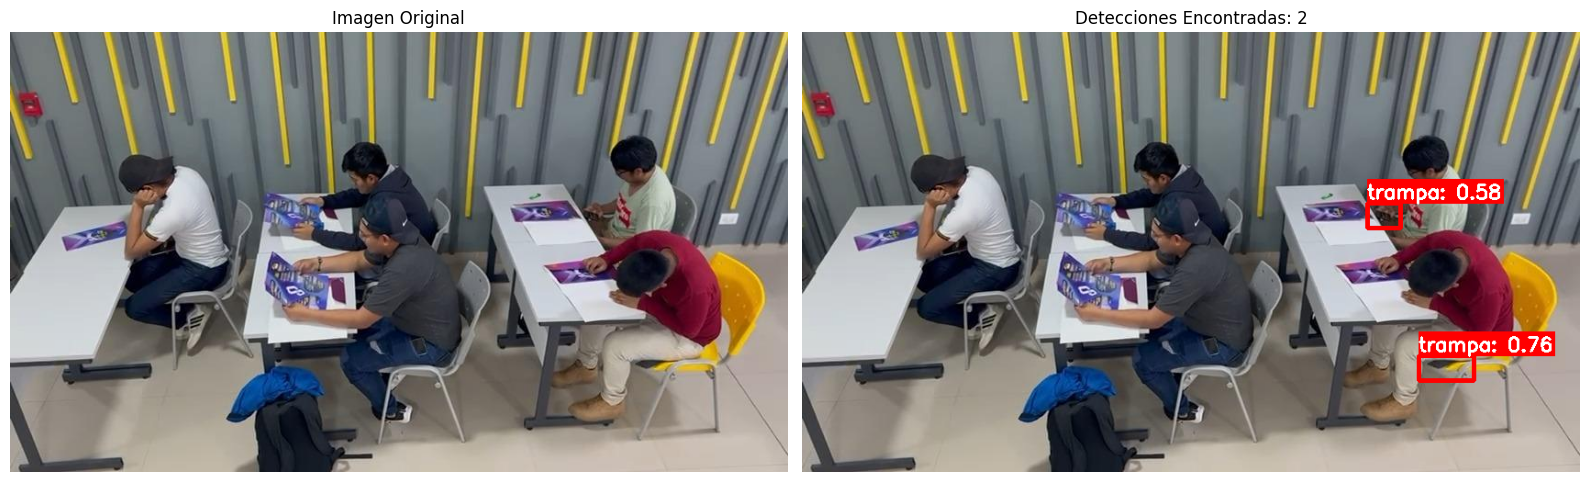


📊 Resumen de detecciones:
Total de detecciones: 2
  1. trampa: 0.762 (área: 1620 px²)
  2. trampa: 0.582 (área: 972 px²)

📈 Estadísticas:
  Confianza promedio: 0.672
  Confianza máxima: 0.762
  Confianza mínima: 0.582

🚨 ¡TRAMPA DETECTADA EN LA IMAGEN!


In [12]:
# ================================
# CELDA 13: Inferencia en imagen individual
# ================================

def inferencia_imagen(image_path, modelo, conf_threshold=0.5):
    """Realiza inferencia en una imagen y muestra resultados con matplotlib"""

    # Verificar si la imagen existe
    if not os.path.exists(image_path):
        print(f"Error: Imagen no encontrada en {image_path}")
        return

    # Cargar imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: No se pudo cargar la imagen {image_path}")
        return

    # Convertir BGR a RGB para matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Realizar inferencia
    results = modelo(image_path, conf=conf_threshold, verbose=True)

    # Crear figura para mostrar resultados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Imagen original
    ax1.imshow(image_rgb)
    ax1.set_title('Imagen Original')
    ax1.axis('off')

    # Imagen con detecciones
    image_with_detections = image_rgb.copy()
    detecciones_encontradas = []

    # Procesar resultados
    for r in results:
        boxes = r.boxes
        if boxes is not None:
            for i, box in enumerate(boxes):
                # Obtener coordenadas y confianza
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())

                # Obtener nombre de la clase
                class_name = modelo.names[cls] if cls < len(modelo.names) else f'Class_{cls}'

                if conf >= conf_threshold:
                    # Dibujar bounding box
                    cv2.rectangle(image_with_detections, (x1, y1), (x2, y2), (255, 0, 0), 3)

                    # Preparar etiqueta
                    label = f'{class_name}: {conf:.2f}'

                    # Calcular posición del texto
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)

                    # Dibujar fondo del texto
                    cv2.rectangle(image_with_detections, (x1, y1-text_height-10),
                                 (x1+text_width, y1), (255, 0, 0), -1)

                    # Dibujar texto
                    cv2.putText(image_with_detections, label, (x1, y1-5),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

                    # Guardar información de la detección
                    detecciones_encontradas.append({
                        'clase': class_name,
                        'confianza': conf,
                        'bbox': [x1, y1, x2, y2],
                        'area': (x2-x1) * (y2-y1)
                    })

                    print(f"✅ Detección {i+1}: {class_name} (confianza: {conf:.3f})")

    # Mostrar imagen con detecciones
    ax2.imshow(image_with_detections)
    ax2.set_title(f'Detecciones Encontradas: {len(detecciones_encontradas)}')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Mostrar resumen
    if detecciones_encontradas:
        print(f"\n📊 Resumen de detecciones:")
        print(f"Total de detecciones: {len(detecciones_encontradas)}")
        for i, det in enumerate(detecciones_encontradas):
            print(f"  {i+1}. {det['clase']}: {det['confianza']:.3f} (área: {det['area']} px²)")

        # Mostrar estadísticas
        confianzas = [det['confianza'] for det in detecciones_encontradas]
        print(f"\n📈 Estadísticas:")
        print(f"  Confianza promedio: {np.mean(confianzas):.3f}")
        print(f"  Confianza máxima: {max(confianzas):.3f}")
        print(f"  Confianza mínima: {min(confianzas):.3f}")

        if any('trampa' in det['clase'].lower() for det in detecciones_encontradas):
            print("\n🚨 ¡TRAMPA DETECTADA EN LA IMAGEN!")
    else:
        print("\n❌ No se encontraron detecciones")

    return detecciones_encontradas

# Ejecutar inferencia en la imagen específica
IMAGE_PATH = '/content/drive/MyDrive/modeloTrampa/trampa/train/images/VID-20250628-WA0088_mp4-0011_jpg.rf.38c206d57f97f414053273d2c99710d5.jpg'

print("🔍 Realizando inferencia en imagen individual...")
print(f"📁 Ruta: {IMAGE_PATH}")
print("="*80)

detecciones = inferencia_imagen(IMAGE_PATH, best_model, conf_threshold=0.3)


In [13]:
!cp -r /content/runs/detect/trampa_detector5 /content/drive/MyDrive/modeloTrampa